In [1]:
import os
import glob
import json
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

def load_from_pickle(filepath):
    """Load json_tempodata from a Pickle (.pkl) file."""
    # filepath = os.path.join(readpath, filename)
    with open(filepath, "rb") as f:
        json_tempodata = pickle.load(f)
    return json_tempodata

#### Hop Size vs. Accuracy Across Different Window Sizes

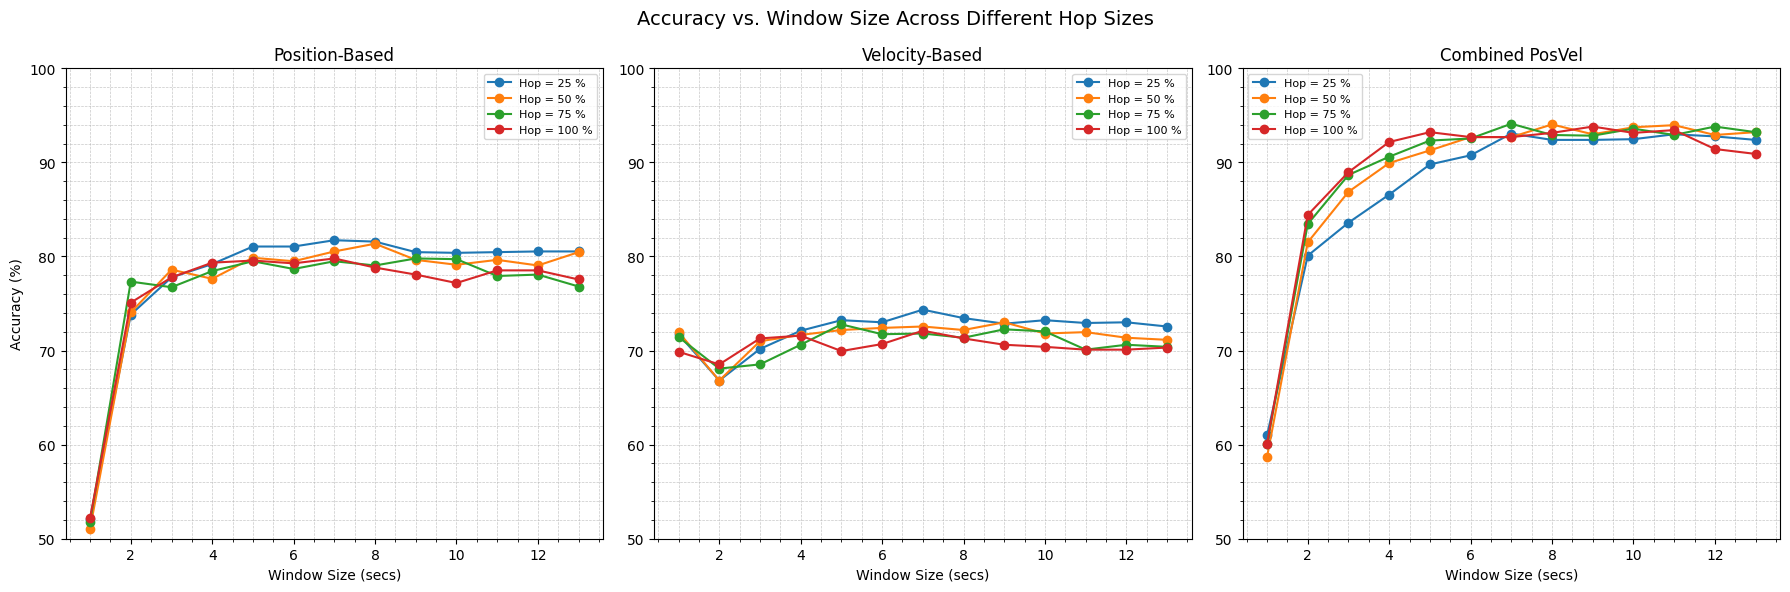

In [2]:
a = 70
b = 145
mode = "uni"
norm_mode = "z-score"
case = "win_case_2"
bpm_metric = "bpm_median_xy"
win_size_list = np.arange(1,14).tolist()

bpm_dict = {
    "bpm_avg_x": 0, "bpm_avg_y": 1, "bpm_avg_xy": 2, "bpm_mode_x": 3,
    "bpm_mode_y": 4, "bpm_mode_xy": 5, "bpm_median_x": 6, "bpm_median_y": 7,
    "bpm_median_xy": 8
}


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=False)

titles = ["Position-Based", "Velocity-Based", "Combined PosVel"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Blue, Orange, Green, Red
hop_labels = ["Hop = 25 %", "Hop = 50 %", "Hop = 75 %", "Hop = 100 %"]

# Iterate through hop sizes
for j, h_factor in enumerate([0.25, 0.5, 0.75, 1]):
    pos_acc_list = []
    vel_acc_list = []
    posvel_acc_list = []

    # Iterate through window sizes
    for w_sec in win_size_list:
        h_sec = w_sec * h_factor  # Calculate actual hop size
        
        # Load accuracy data
        hpos_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        hvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        hposvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")

        # Extract accuracy
        pos_acc_list.append(hpos_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])  
        vel_acc_list.append(hvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])
        posvel_acc_list.append(hposvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])

    # Plot in respective subplots
    axes[0].plot(win_size_list, pos_acc_list, marker='o', linestyle='-', label=hop_labels[j], color=colors[j])
    axes[1].plot(win_size_list, vel_acc_list, marker='o', linestyle='-', label=hop_labels[j], color=colors[j])
    axes[2].plot(win_size_list, posvel_acc_list, marker='o', linestyle='-', label=hop_labels[j], color=colors[j])

# Add titles and labels
for i, ax in enumerate(axes):
    ax.set_title(titles[i], fontsize=12)
    ax.set_xlabel("Window Size (secs)")
    ax.set_ylim(50, 100)  # Keep y-axis consistent
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)  # Enable minor grid
    ax.minorticks_on()
    ax.legend(fontsize=8)  # Add legend for hop sizes

axes[0].set_ylabel("Accuracy (%)")  # Add y-label only for first subplot

# Global title and layout
plt.suptitle("Accuracy vs. Window Size Across Different Hop Sizes", fontsize=14)
plt.tight_layout()
plt.show()

#### Window Size vs. Accuracy for a hop size

[51.08128262490679, 74.04921700223713, 78.59806114839671, 77.62863534675614, 79.86577181208054, 79.49291573452648, 80.53691275167785, 81.3571961222968, 79.64205816554811, 79.1200596569724, 79.64205816554811, 79.0454884414616, 80.46234153616703]
[71.96122296793438, 66.81580909768829, 70.99179716629381, 71.66293810589113, 72.1849366144668, 72.40865026099925, 72.55779269202088, 72.1849366144668, 73.00521998508576, 71.81208053691275, 71.96122296793438, 71.36465324384787, 71.14093959731544]
[58.6875466070097, 81.50633855331841, 86.87546607009693, 89.93288590604027, 91.2751677852349, 92.69202087994034, 92.69202087994034, 94.03430275913497, 92.99030574198359, 93.73601789709173, 93.95973154362416, 92.91573452647278, 93.21401938851604]


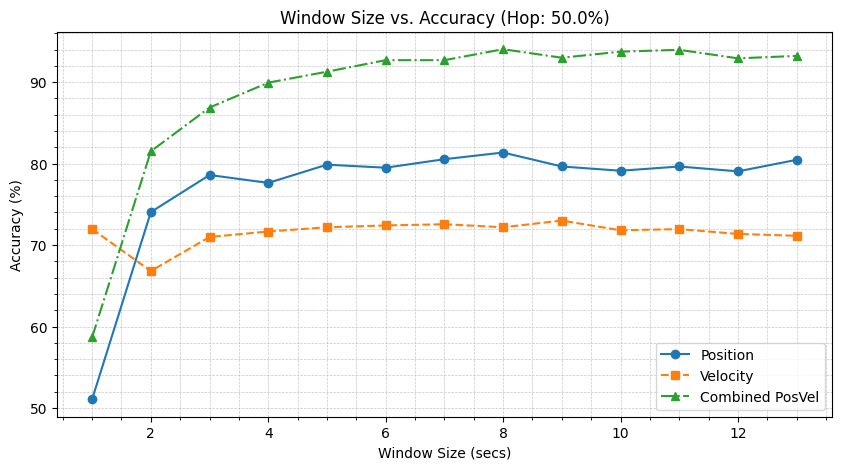

In [5]:
a = 70
b = 145
mode = "uni"
norm_mode = "z-score"
win_size_list = np.arange(1,14).tolist()

bpm_dict = {
    "bpm_avg_x": 0, "bpm_avg_y": 1, "bpm_avg_xy": 2, "bpm_mode_x": 3,
    "bpm_mode_y": 4, "bpm_mode_xy": 5, "bpm_median_x": 6, "bpm_median_y": 7,
    "bpm_median_xy": 8
}
case = "win_case_2"

pos_winacc_list = []
vel_winacc_list = []
posvel_winacc_list = []

bpm_metric = "bpm_median_xy"
overlap = 0.5
for w_sec in win_size_list:         
    # for h_sec in [w_sec*0.25, w_sec*0.5, w_sec*0.75, w_sec*1]:
    h_sec = w_sec* overlap
    
    pos_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
    pos_consistency_stats = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/consistency_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
    pos_hits_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/hit_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
    pos_consistency_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")

    vel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
    vel_consistency_stats = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/consistency_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
    vel_hits_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/hit_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
    vel_consistency_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")

    posvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
    posvel_consistency_stats = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/consistency_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
    posvel_hits_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/hit_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
    posvel_consistency_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
    
    pos_winacc_list.append(pos_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])   # 4th index is the combined acc
    vel_winacc_list.append(vel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])
    posvel_winacc_list.append(posvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])
    

print(pos_winacc_list)
print(vel_winacc_list)
print(posvel_winacc_list)

plt.figure(figsize=(10, 5), dpi=100)

plt.plot(win_size_list, pos_winacc_list, marker='o', linestyle='-', label="Position")
plt.plot(win_size_list, vel_winacc_list, marker='s', linestyle='--', label="Velocity")
plt.plot(win_size_list, posvel_winacc_list, marker='^', linestyle='-.', label="Combined PosVel")

plt.xlabel("Window Size (secs)")
plt.ylabel("Accuracy (%)")
plt.title(f"Window Size vs. Accuracy (Hop: {overlap*100}%)")
plt.legend()
plt.grid(True, which= 'both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.show()

#### Hop Size vs. Accuracy for a Window Size

[81.58090976882923, 81.3571961222968, 79.0454884414616, 78.82177479492915]
[73.45264727815064, 72.1849366144668, 71.36465324384787, 71.29008202833707]
[92.39373601789708, 94.03430275913497, 92.91573452647278, 93.13944817300522]


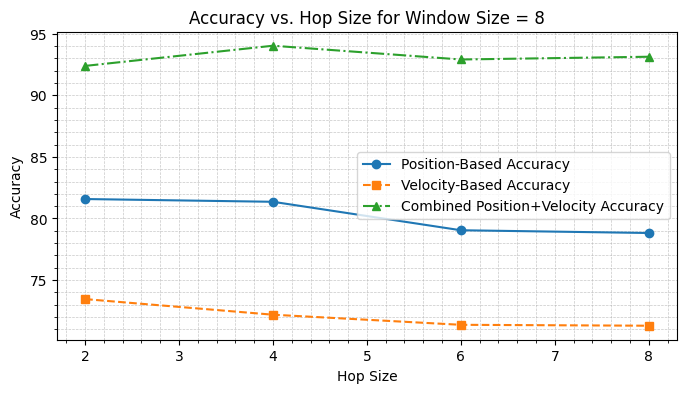

In [3]:
pos_hopacc_list = []
vel_hopacc_list = []
posvel_hopacc_list = []

# win_size_list = np.arange(1,14).tolist()
for w_sec in [8]:
    hop_size_list = [w_sec*0.25, w_sec*0.5, w_sec*0.75, w_sec*1]         
    for h_sec in hop_size_list:
    # h_sec = w_sec* 0.5
        hpos_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        hpos_consistency_stats = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/consistency_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        hpos_hits_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/hit_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
        hpos_consistency_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")

        hvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        hvel_consistency_stats = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/consistency_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        hvel_hits_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/hit_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
        hvel_consistency_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")

        hposvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        hposvel_consistency_stats = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/consistency_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        hposvel_hits_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/hit_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")      # hits summary genre wise          
        hposvel_consistency_stats_genrewise = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/consistency_stats_genrewise_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        
        pos_hopacc_list.append(hpos_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])   # 4th index is the combined acc
        vel_hopacc_list.append(hvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])
        posvel_hopacc_list.append(hposvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])

print(pos_hopacc_list)
print(vel_hopacc_list)
print(posvel_hopacc_list)

plt.figure(figsize=(8, 4))
plt.plot(hop_size_list, pos_hopacc_list, marker='o', linestyle='-', label="Position-Based Accuracy")
plt.plot(hop_size_list, vel_hopacc_list, marker='s', linestyle='--', label="Velocity-Based Accuracy")
plt.plot(hop_size_list, posvel_hopacc_list, marker='^', linestyle='-.', label="Combined Position+Velocity Accuracy")

plt.xlabel("Hop Size")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs. Hop Size for Window Size = {w_sec}")
plt.legend()
plt.grid(True, which= 'both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=len(win_size_list), figsize=(8, 20), sharex=False)

# for i, w_sec in enumerate(win_size_list):
#     pos_hopacc_list = []
#     vel_hopacc_list = []
#     posvel_hopacc_list = []
    
#     hop_size_list = [w_sec*0.25, w_sec*0.5, w_sec*0.75, w_sec*1]

#     for h_sec in hop_size_list:
#         hpos_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
#         hvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
#         hposvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/{mode}/hit_stats_W{w_sec}H{h_sec}_{mode}_{a}_{b}.pkl")
        
#         pos_hopacc_list.append(hpos_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])  
#         vel_hopacc_list.append(hvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])
#         posvel_hopacc_list.append(hposvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])

#     ax = axes[i]  # Select subplot
#     ax.plot(hop_size_list, pos_hopacc_list, marker='o', linestyle='-', label="Position-Based Accuracy")
#     ax.plot(hop_size_list, vel_hopacc_list, marker='s', linestyle='--', label="Velocity-Based Accuracy")
#     ax.plot(hop_size_list, posvel_hopacc_list, marker='^', linestyle='-.', label="Combined Position+Velocity Accuracy")
    
#     ax.set_title(f"Win Size = {w_sec}")
#     # ax.legend(fontsize=8)
#     ax.grid(True)
#     ax.set_ylim(40,100)

# plt.xlabel("Hop Size")
# plt.tight_layout()
# plt.show()
